<a href="https://colab.research.google.com/github/MitaTriAndari/Kelompok_2/blob/main/Transformasi_Cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transformasi Cosine (Discrete Cosine Transform)**

Jadi Apa itu DCT?

Untuk memahami DCT terlebih dahulu Anda perlu memahami tentang domain spasial dan domain frekuensi. Domain Spasial dan Domain Frekuensi merupakan teknik peningkatan citra. Mari kita bicara tentang masing-masingnya.

Domain Spasial: Teknik Domain Spasial berkaitan dengan piksel gambar. Nilai piksel dimanipulasi untuk mencapai peningkatan yang diinginkan.

Domain Frekuensi: Teknik ini didasarkan pada manipulasi transformasi ortogonal gambar daripada gambar itu sendiri, misalnya perubahan fase, amplitudo.

Di DCT, gambar dari domain spasial diubah menjadi domain frekuensi
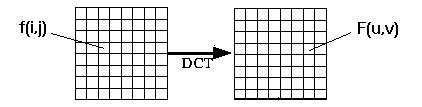

n gambar domain spasial diagram di atas f(i, j) diubah menjadi domain frekuensi F(u, v) menggunakan DCT

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt


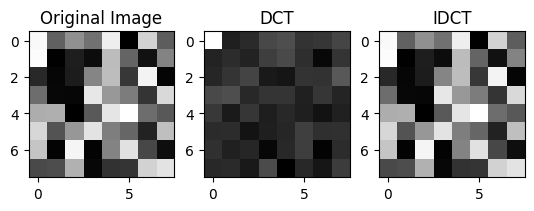

In [ ]:
# Fungsi untuk melakukan DCT pada matriks 2D
def dct2(a):
    return dct(dct(a, axis=0, norm='ortho'), axis=1, norm='ortho')

# Fungsi untuk melakukan invers DCT pada matriks 2D
def idct2(a):
    return idct(idct(a, axis=0, norm='ortho'), axis=1, norm='ortho')

# Contoh matriks 8x8
matrix_size = 8
sample_matrix = np.random.random((matrix_size, matrix_size))

# Melakukan DCT pada matriks
dct_result = dct2(sample_matrix)

# Melakukan invers DCT pada matriks yang telah di-DCT
idct_result = idct2(dct_result)

# Menampilkan hasil
plt.subplot(1, 3, 1)
plt.imshow(sample_matrix, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(dct_result, cmap='gray')
plt.title('DCT')

plt.subplot(1, 3, 3)
plt.imshow(idct_result, cmap='gray')
plt.title('IDCT')

plt.show()

# **DCT Low Frequencies**

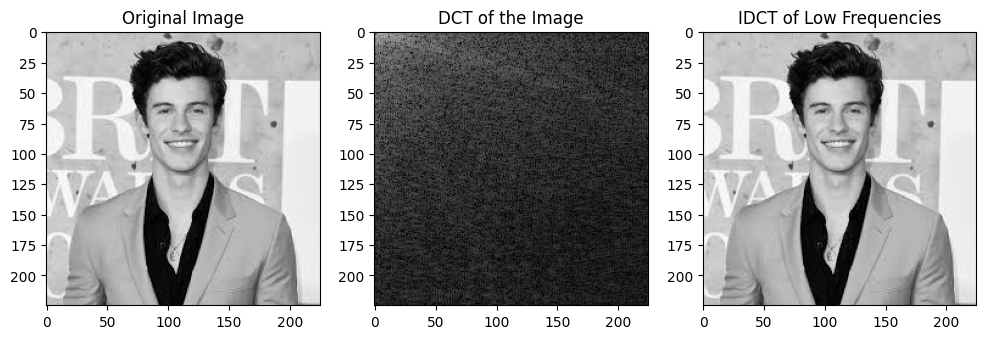

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image_path = "/content/shawn mendes.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Perform Discrete Cosine Transform (DCT)
dct_image = cv2.dct(np.float32(image))

# Set a threshold to keep only low-frequency components
threshold = 0.1  # Adjust the threshold as needed
dct_image_low_freq = dct_image * (np.abs(dct_image) > threshold)

# Perform Inverse Discrete Cosine Transform (IDCT)
idct_image_low_freq = cv2.idct(np.float32(dct_image_low_freq))

# Display the original and low-frequency DCT-transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(dct_image) + 1), cmap='gray')  # Log scale for better visualization
plt.title('DCT of the Image')

plt.subplot(1, 3, 3)
plt.imshow(idct_image_low_freq, cmap='gray')
plt.title('IDCT of Low Frequencies')

plt.show()


# **Middle Frequencies**

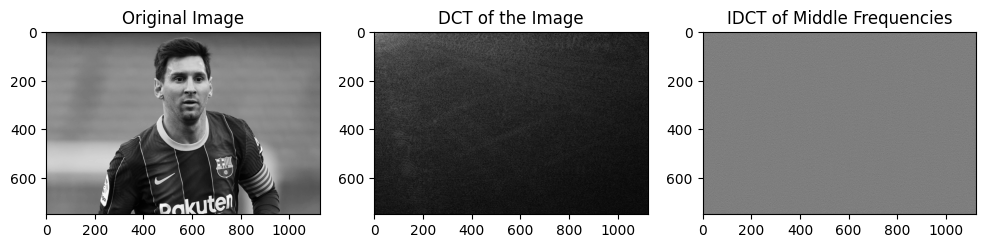

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# memuat gambar
image_path = "/content/toduov30vtoapjgwutlr-1.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar dalam skala abu-abu
# Lakukan Transformasi Kosinus Diskrit (DCT)
dct_image = cv2.dct(np.float32(image))

# Atur rentang frekuensi yang akan dipertahankan (mis., frekuensi menengah)
low_cutoff = 0.1  # Sesuaikan cutoff bawah sesuai kebutuhan
high_cutoff = 0.5  # Sesuaikan cutoff yang lebih tinggi sesuai kebutuhan

# Buat topeng biner untuk menyimpan hanya komponen frekuensi yang diinginkan
dct_image_middle_freq = dct_image * (np.abs(dct_image) >= low_cutoff) * (np.abs(dct_image) <= high_cutoff)

# Lakukan Inverse Discrete Cosine Transform (IDCT)
idct_image_middle_freq = cv2.idct(np.float32(dct_image_middle_freq))
# Menampilkan gambar transformasi DCT frekuensi menengah dan asli
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(dct_image) + 1), cmap='gray')  # Skala log untuk visualisasi yang lebih baik
plt.title('DCT of the Image')

plt.subplot(1, 3, 3)
plt.imshow(idct_image_middle_freq, cmap='gray')
plt.title('IDCT of Middle Frequencies')

plt.show()


# **High Frequencies**

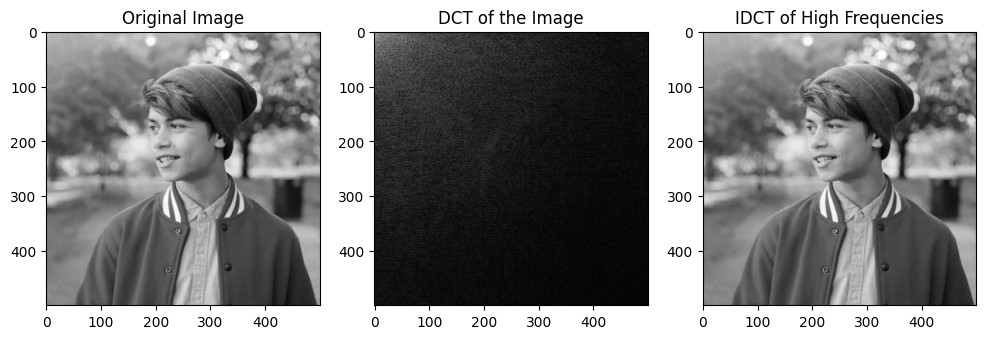

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# mengambil gambar
image_path = "/content/harris j.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar dalam skala abu-abu

# Lakukan Transformasi Kosinus Diskrit (DCT)
dct_image = cv2.dct(np.float32(image))

# Tetapkan ambang batas untuk hanya menyimpan komponen frekuensi tinggi
threshold = 0.5  # Sesuaikan ambang batas sesuai kebutuhan
dct_image_high_freq = dct_image * (np.abs(dct_image) > threshold)

# Lakukan Inverse Discrete Cosine Transform (IDCT)
idct_image_high_freq = cv2.idct(np.float32(dct_image_high_freq))

# Menampilkan gambar transformasi DCT asli dan frekuensi tinggi
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(dct_image) + 1), cmap='gray')  # Skala log untuk visualisasi yang lebih baik
plt.title('DCT of the Image')

plt.subplot(1, 3, 3)
plt.imshow(idct_image_high_freq, cmap='gray')
plt.title('IDCT of High Frequencies')

plt.show()